In [1]:
#공통
%matplotlib inline
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

# 맷플롯립 한글폰트 지정
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

#맷플롯립 설정
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.dpi'] = 150
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) + 
    cycler('linestyle', ['-','-',"--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## 분류에 대한 선형 모델

C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


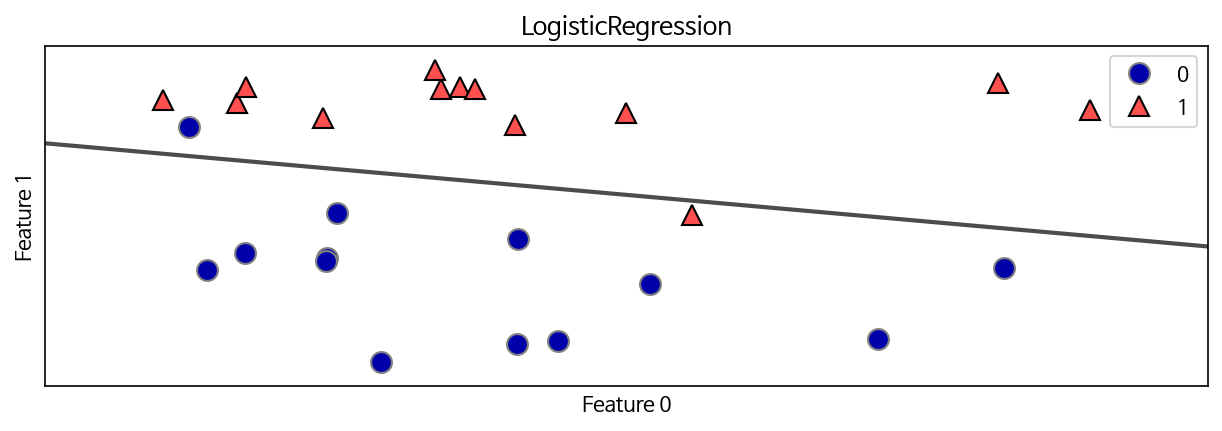

In [2]:
from sklearn.linear_model import LogisticRegression
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, ax = plt.subplots(1, 1, figsize=(10, 3))

model = LogisticRegression()

clf = model.fit(X,y)
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                ax=ax, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
ax.set_title(clf.__class__.__name__)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.941
테스트 세트 점수: 0.965


C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
logreg100 = LogisticRegression(C=1000000000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.951


C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
logreg001 = LogisticRegression(C=0.00001).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.920
테스트 세트 점수: 0.916


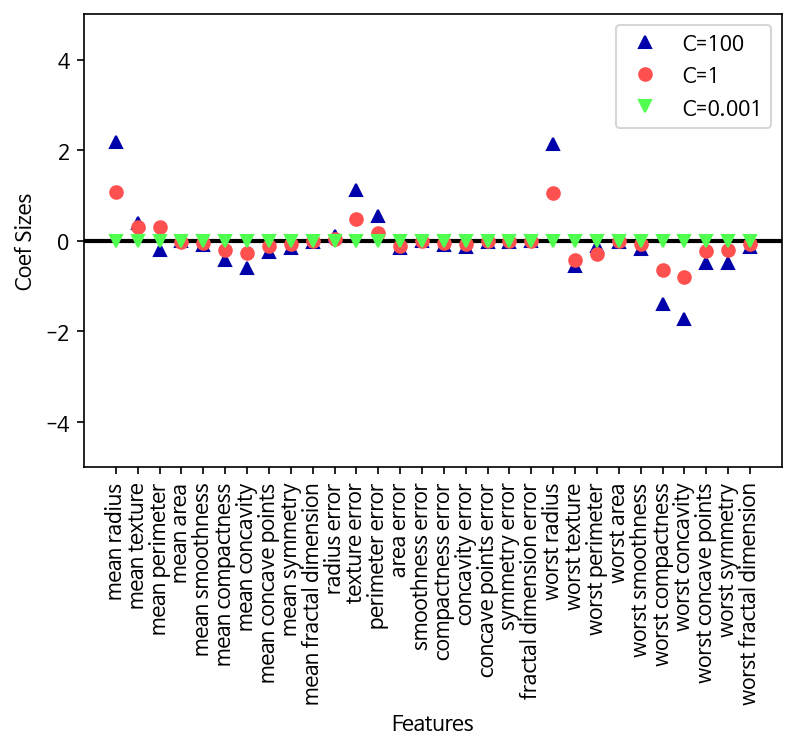

In [11]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Features") #특성
plt.ylabel("Coef Sizes") #계수 크기
plt.legend()

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


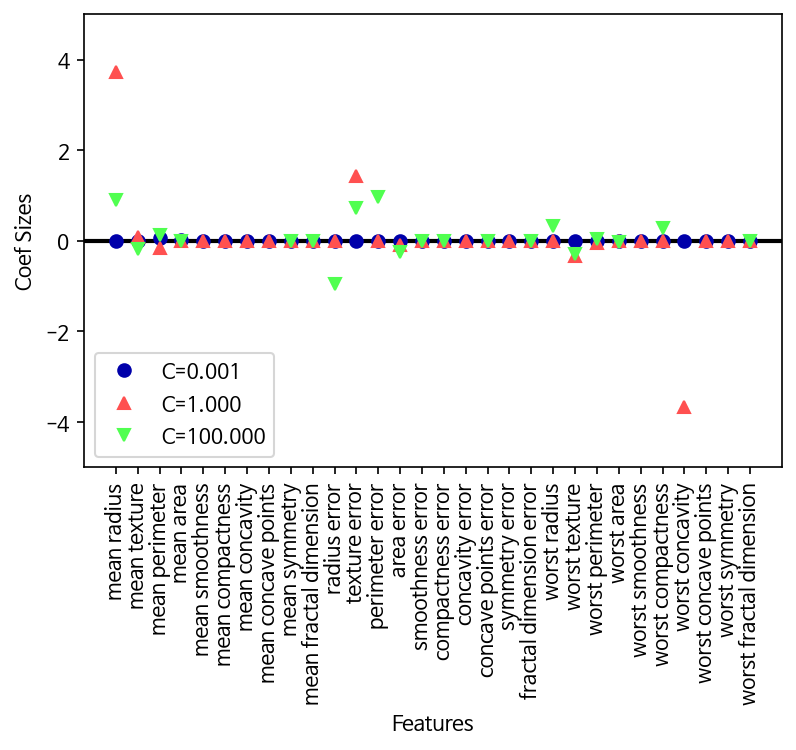

In [13]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Features") #특성
plt.ylabel("Coef Sizes") #계수 크기

plt.ylim(-5, 5)
plt.legend(loc=3)

## 다중 클래스 분류를 위한 선형 모델

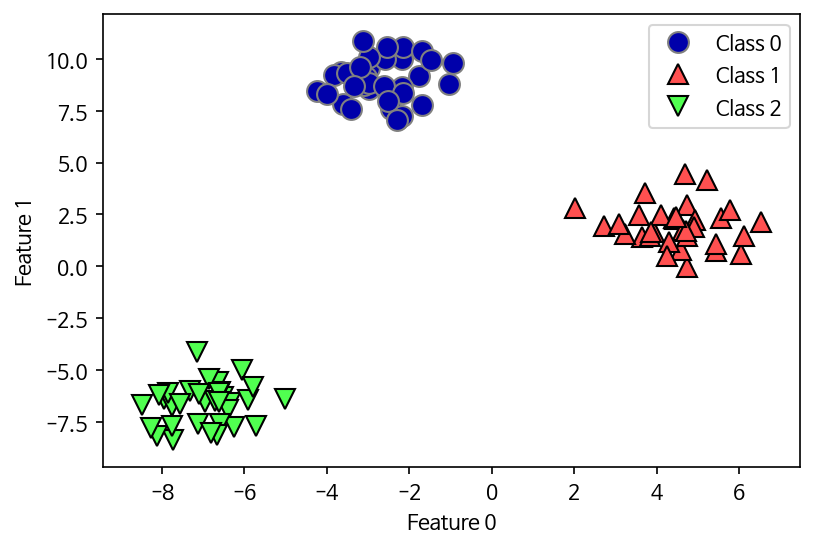

In [14]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [15]:
#from sklearn.svm import LinearSVC
linear_svm = LogisticRegression().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape) #w
print("절편 배열의 크기: ", linear_svm.intercept_.shape) #bias -> b

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


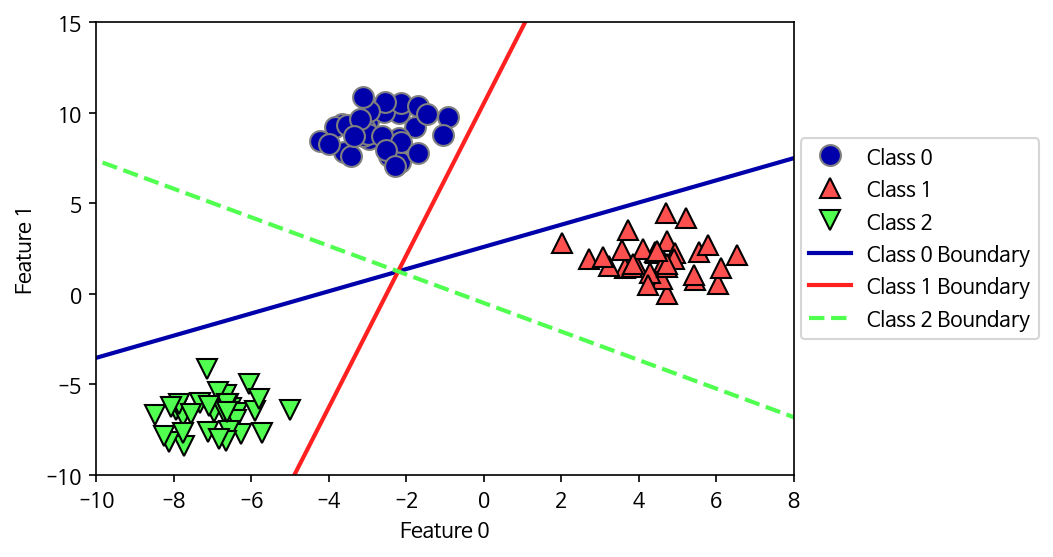

In [16]:
import numpy as np
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 Boundary', 'Class 1 Boundary',
            'Class 2 Boundary'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

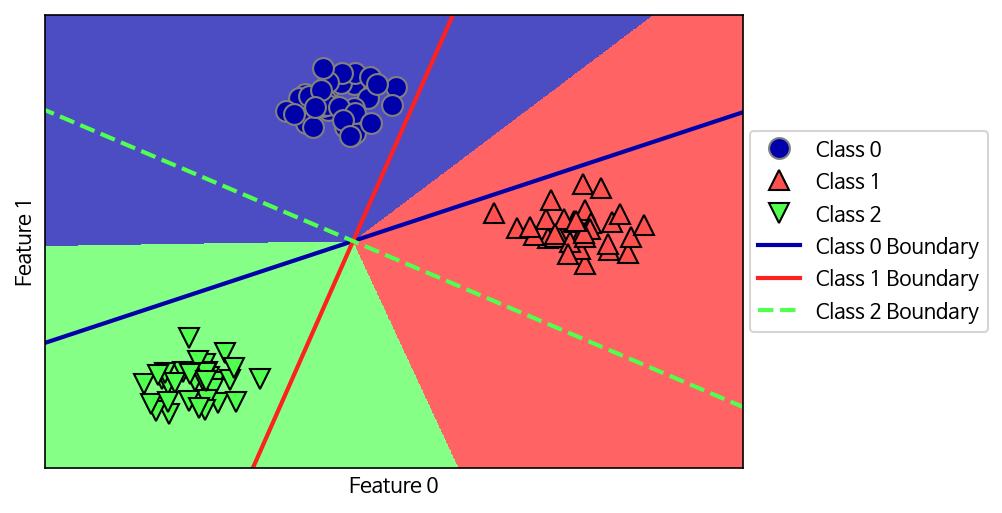

In [17]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 Boundary', 'Class 1 Boundary',
            'Class 2 Boundary'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 장단점과 매개변수

In [18]:
# 한 줄에서 모델의 객체 생성과 학습을 한 번에 실행합니다.
logreg = LogisticRegression().fit(X_train, y_train)

C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 가우시안 나이브 베이즈 분류기

## 날씨, 기온에 따른 축구 여부 분류

## 2개의 Feature (Weather, Temp)와 1개의 Label(Play)로 구성된 dataset을 아래와 같이 만들어 줌

In [21]:
# Assigning Features and label variables
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast',\
           'Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']

temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool',\
        'Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play = ['No','No','Yes','Yes','Yes','No','Yes','No',\
        'Yes','Yes','Yes','Yes','Yes','No']

In [22]:
#string을 int로 바꾸어 주는 Feature Encoding을 실시
# import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()
#Converting string labels into numbers
weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [24]:
#Temp와 play도 인코딩 실시
#Converting string labels into numbers
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)
print("Temp :", temp_encoded)
print("Play :", label)

Temp : [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play : [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [25]:
#Combinig weather and temp into single listof tuples
features=zip(weather_encoded,temp_encoded)
features=list(features)
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [27]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted) # 1: Yes

#다항분포

#베르누이

Predicted Value: [1]


## 결과가 여러개인 경우

In [28]:
#import scikit-learn dataset libray
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

#print the names of the 13 features
print("Features :", wine.feature_names)

#print the label type of wine(class_0, class_1, class_2)
print("Labels :", wine.target_names)

Features : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels : ['class_0' 'class_1' 'class_2']


In [29]:
wine.data.shape

(178, 13)

In [30]:
wine.data[0:5]

array([[  14.23,    1.71,    2.43,   15.6 ,  127.  ,    2.8 ,    3.06,
           0.28,    2.29,    5.64,    1.04,    3.92, 1065.  ],
       [  13.2 ,    1.78,    2.14,   11.2 ,  100.  ,    2.65,    2.76,
           0.26,    1.28,    4.38,    1.05,    3.4 , 1050.  ],
       [  13.16,    2.36,    2.67,   18.6 ,  101.  ,    2.8 ,    3.24,
           0.3 ,    2.81,    5.68,    1.03,    3.17, 1185.  ],
       [  14.37,    1.95,    2.5 ,   16.8 ,  113.  ,    3.85,    3.49,
           0.24,    2.18,    7.8 ,    0.86,    3.45, 1480.  ],
       [  13.24,    2.59,    2.87,   21.  ,  118.  ,    2.8 ,    2.69,
           0.39,    1.82,    4.32,    1.04,    2.93,  735.  ]])

In [31]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [32]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,\
                                                    test_size=0.3, random_state=109)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


## 나이브 베이즈 예제 뉴스 헤드라인 분석

In [33]:
import pandas as pd

In [34]:
news = pd.read_csv('./uci-news-aggregator.csv').sample(frac=0.1)

In [35]:
len(news)

42242

In [37]:
news.head(3)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
2035,2036,Edward Snowden was bigger than a rock star at ...,http://www.pri.org/stories/2014-03-10/edward-s...,Public Radio International,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,www.pri.org,1394513135132
264623,265069,Robert De Niro talks about gay father; directs...,http://www.pep.ph/news/43609/robert-de-niro-ta...,Philippine Entertainment Portal,e,decAMVoOQGGru7MXpwTNSnpTz8r_M,www.pep.ph,1401362422534
287066,287526,Kelly Clarkson Gives Birth To Daughter Named R...,http://www.contactmusic.com/article/kelly-clar...,Contactmusic.com,e,d2dizrwt_o6PCKMtLsi4bCvrs6IuM,www.contactmusic.com,1402812082000


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
encoder = LabelEncoder()

In [40]:
X = news['TITLE']
y = encoder.fit_transform(news['CATEGORY'])

In [43]:
y

array([3, 1, 1, ..., 3, 2, 0])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

We count the number of occurences of each word and use it as our features.

In [44]:
len(X_train)

31681

In [45]:
len(X_test)

10561

In [46]:
X_train.head

<bound method NDFrame.head of 184460    Twitter Inc. (TWTR) Has Fallen To A New Low Af...
252122     Google, Other Tech Companies Among Top Employers
64171     Hold the margarita? Lime prices skyrocket nati...
240998    Hewlett-Packard Company Matches Q2 EPS Estimat...
410960    Watch: Revisit Every Marvel Easter Egg In One ...
                                ...                        
420494    See If You Can Spot All The Random Celebrities...
154600             Why TV watchers could lose if Aereo wins
188026    Financial News Today: Alibaba Files, Twitter P...
58426     Scandal Season 3 Episode 15 “Mama Said Knock Y...
255823    Watch Dogs In Real Life: How Hackers Took Cont...
Name: TITLE, Length: 31681, dtype: object>

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3)

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [48]:
train_vectors

<31681x9863 sparse matrix of type '<class 'numpy.int64'>'
	with 266745 stored elements in Compressed Sparse Row format>

In [49]:
X_train.iloc[1]

'Google, Other Tech Companies Among Top Employers'

In [50]:
type(train_vectors)

scipy.sparse.csr.csr_matrix

In [51]:
#one-hot vector
train_vectors[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
train_vectors.toarray().shape

(31681, 9863)

In [57]:
from sklearn.metrics import accuracy_score

## 가우시안 나이브 베이즈 분류기

In [58]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_vectors.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
pred = clf.predict(test_vectors.toarray())
accuracy_score(y_test, pred)

0.8140327620490484

## 다항 나이브 베이즈 분류기

In [62]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_vectors, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
pred = clf.predict(test_vectors)
accuracy_score(y_test, pred, )

0.9031341729002935

## 베르누이 나이브 베이즈 분류기

In [64]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(train_vectors, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [65]:
pred = clf.predict(test_vectors.toarray())
accuracy_score(y_test, pred, )

0.9024713568790834

## 커널 서포트 벡터 머신

### 선형 모델과 비선형 특성

[3 2 1 3 3 0 2 1 3 3 0 0 3 1 1 2 2 3 3 0 0 1 0 0 3 0 0 3 2 1 1 3 1 3 0 2 3
 0 1 2 1 3 2 2 0 2 1 0 1 1 1 2 0 0 3 2 2 2 0 3 3 2 1 2 0 1 3 1 0 0 1 2 0 1
 0 0 3 2 3 1 2 0 3 2 3 2 0 2 2 3 1 0 3 2 2 1 1 3 1 1]
[1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1]


Text(0, 0.5, '특성 1')

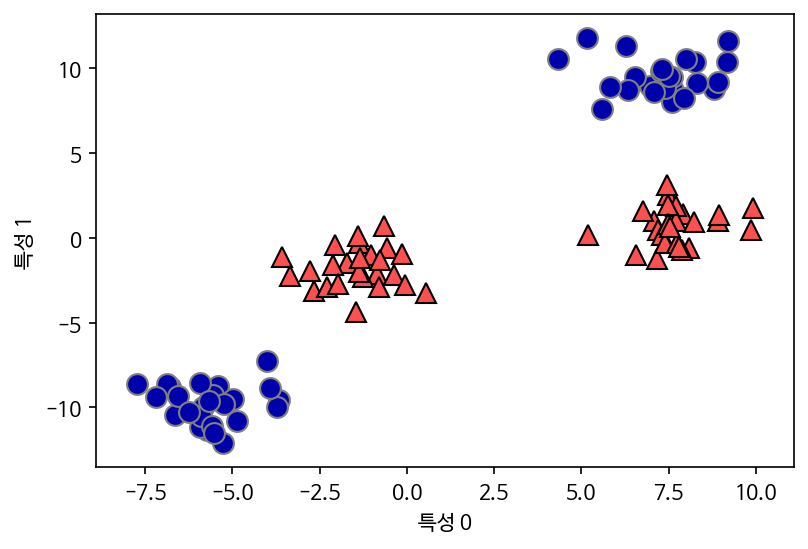

In [70]:
X, y = make_blobs(centers=4, random_state=8)
print(y)
y = y % 2
print(y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

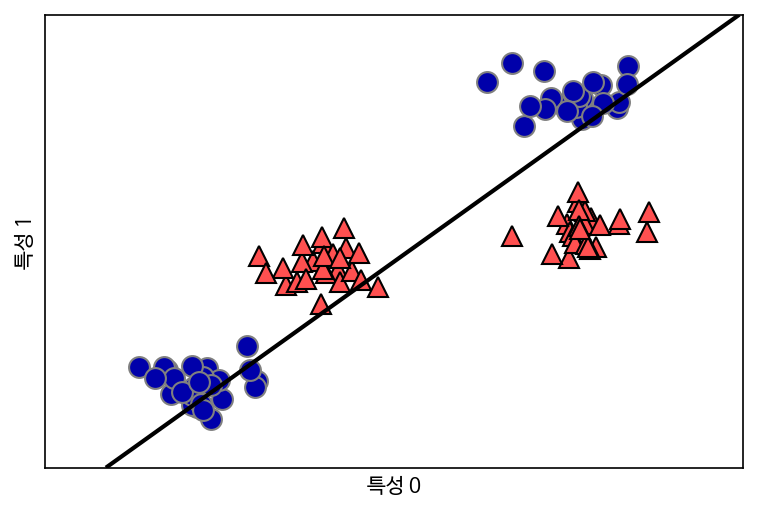

In [71]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

[[ -1.722  -1.48 ]
 [ -3.657  -9.548]
 [  7.078   0.995]
 [ -1.366  -0.315]
 [ -2.665  -3.126]
 [  7.63    8.698]
 [ -5.271 -12.119]
 [  7.918   1.415]
 [ -1.413   0.113]
 [ -1.015  -1.033]
 [  8.263  10.347]
 [  6.968   8.962]
 [ -0.848  -2.122]
 [  7.48    2.494]
 [  7.715   1.842]
 [ -7.741  -8.618]
 [ -5.411  -8.719]
 [ -2.276  -2.897]
 [ -1.257  -2.334]
 [  7.612   9.446]
 [  8.815   8.764]
 [  7.19    0.431]
 [  7.403   9.162]
 [  5.172  11.781]
 [ -2.105  -1.578]
 [  6.534   9.455]
 [  7.596   8.02 ]
 [ -0.656   0.69 ]
 [ -4.861 -10.774]
 [  8.909   0.978]
 [  8.098  -0.584]
 [ -0.798  -2.886]
 [  9.929   1.767]
 [ -1.361  -2.027]
 [  5.599   7.592]
 [ -4.985  -9.517]
 [ -0.571  -0.606]
 [  6.285  11.287]
 [  7.468   3.103]
 [ -5.547  -9.272]
 [  7.719   0.992]
 [ -0.359  -2.202]
 [ -3.713  -9.995]
 [ -5.734 -11.329]
 [  7.294   9.795]
 [ -5.917 -11.162]
 [  8.238   0.924]
 [  8.911   9.149]
 [  7.312   0.148]
 [  7.5     1.948]
 [  7.157  -1.269]
 [ -5.246  -9.818]
 [  7.406   

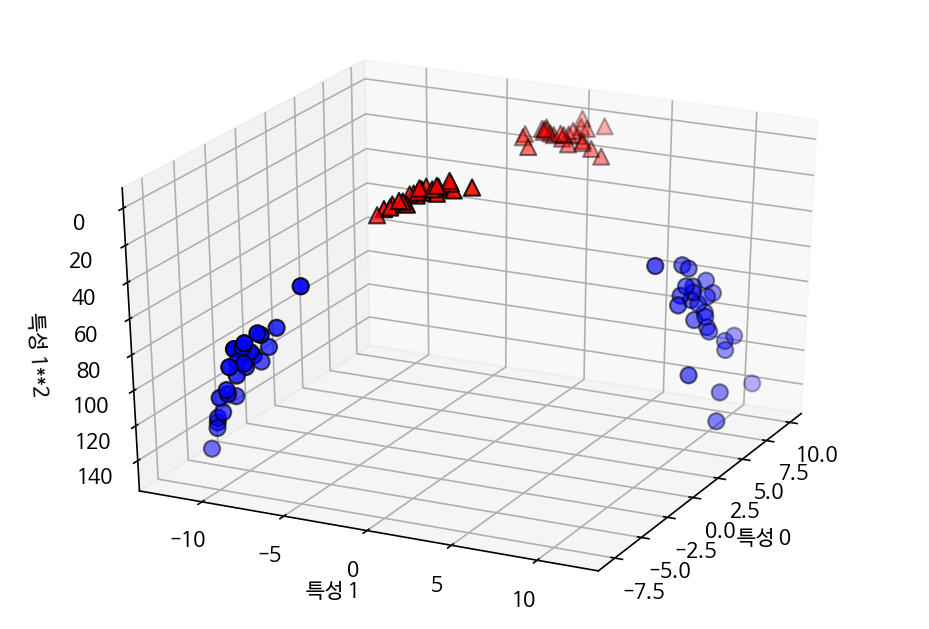

In [75]:
#두 번째 특성을 제곱하여 추가합니다.
print(X)
X_new = np.hstack([X, X[:, 1:] ** 2])
print(X_new)
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y==0인 포인트를 먼저 그리고 그다음 y==1인포인트를 그린다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker="^",
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")

plt.show()

(50,)
(50, 50)


C:\Anaconda3\envs\inhatc\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성 1**2')

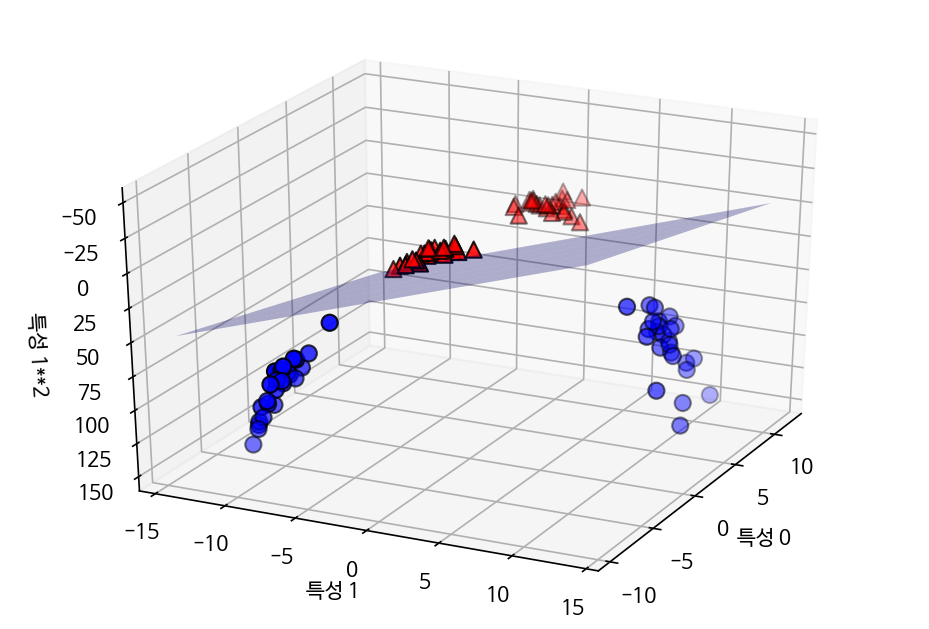

In [78]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

#print(yy.shape)
XX, YY = np.meshgrid(xx, yy)
#print(YY.shape)

ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker="^",
           cmap=mglearn.cm2 , s=60, edgecolor='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")

Text(0, 0.5, '특성 1')

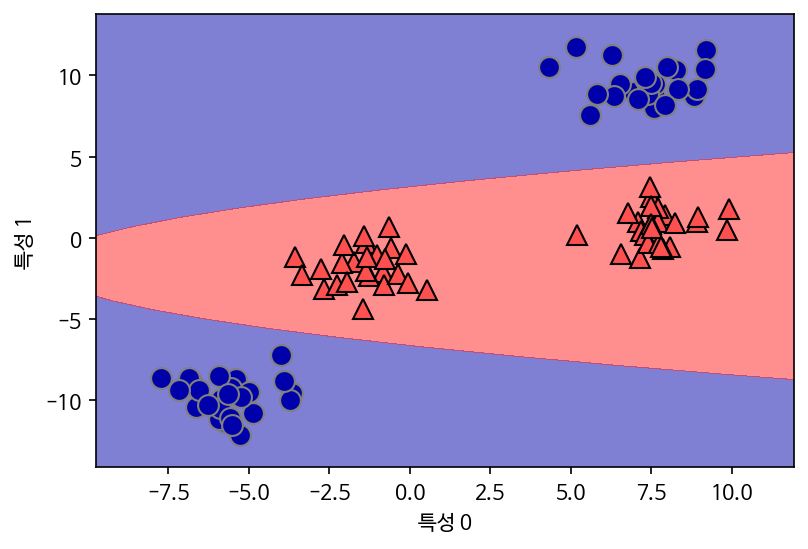

In [77]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 커널 기법

### SVM 이해하기

[[ 8.106  4.287]
 [ 9.502  1.938]
 [11.564  1.339]
 [10.24   2.455]
 [ 7.998  4.853]]
[[-10.     -6.252  -3.734  10.      9.986]]
[False False False  True  True]


Text(0, 0.5, '특성 1')

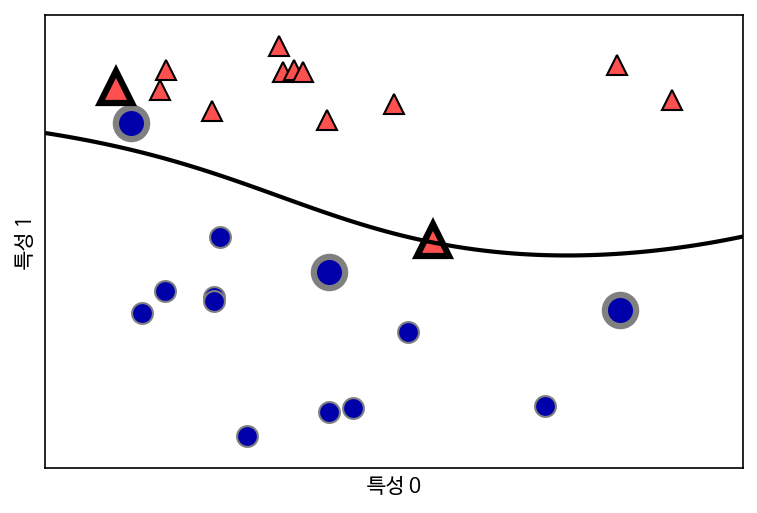

In [82]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) #핵심
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
print(sv)
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() > 0
print(svm.dual_coef_)
print(sv_labels)
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### SVM 매개변수 튜닝

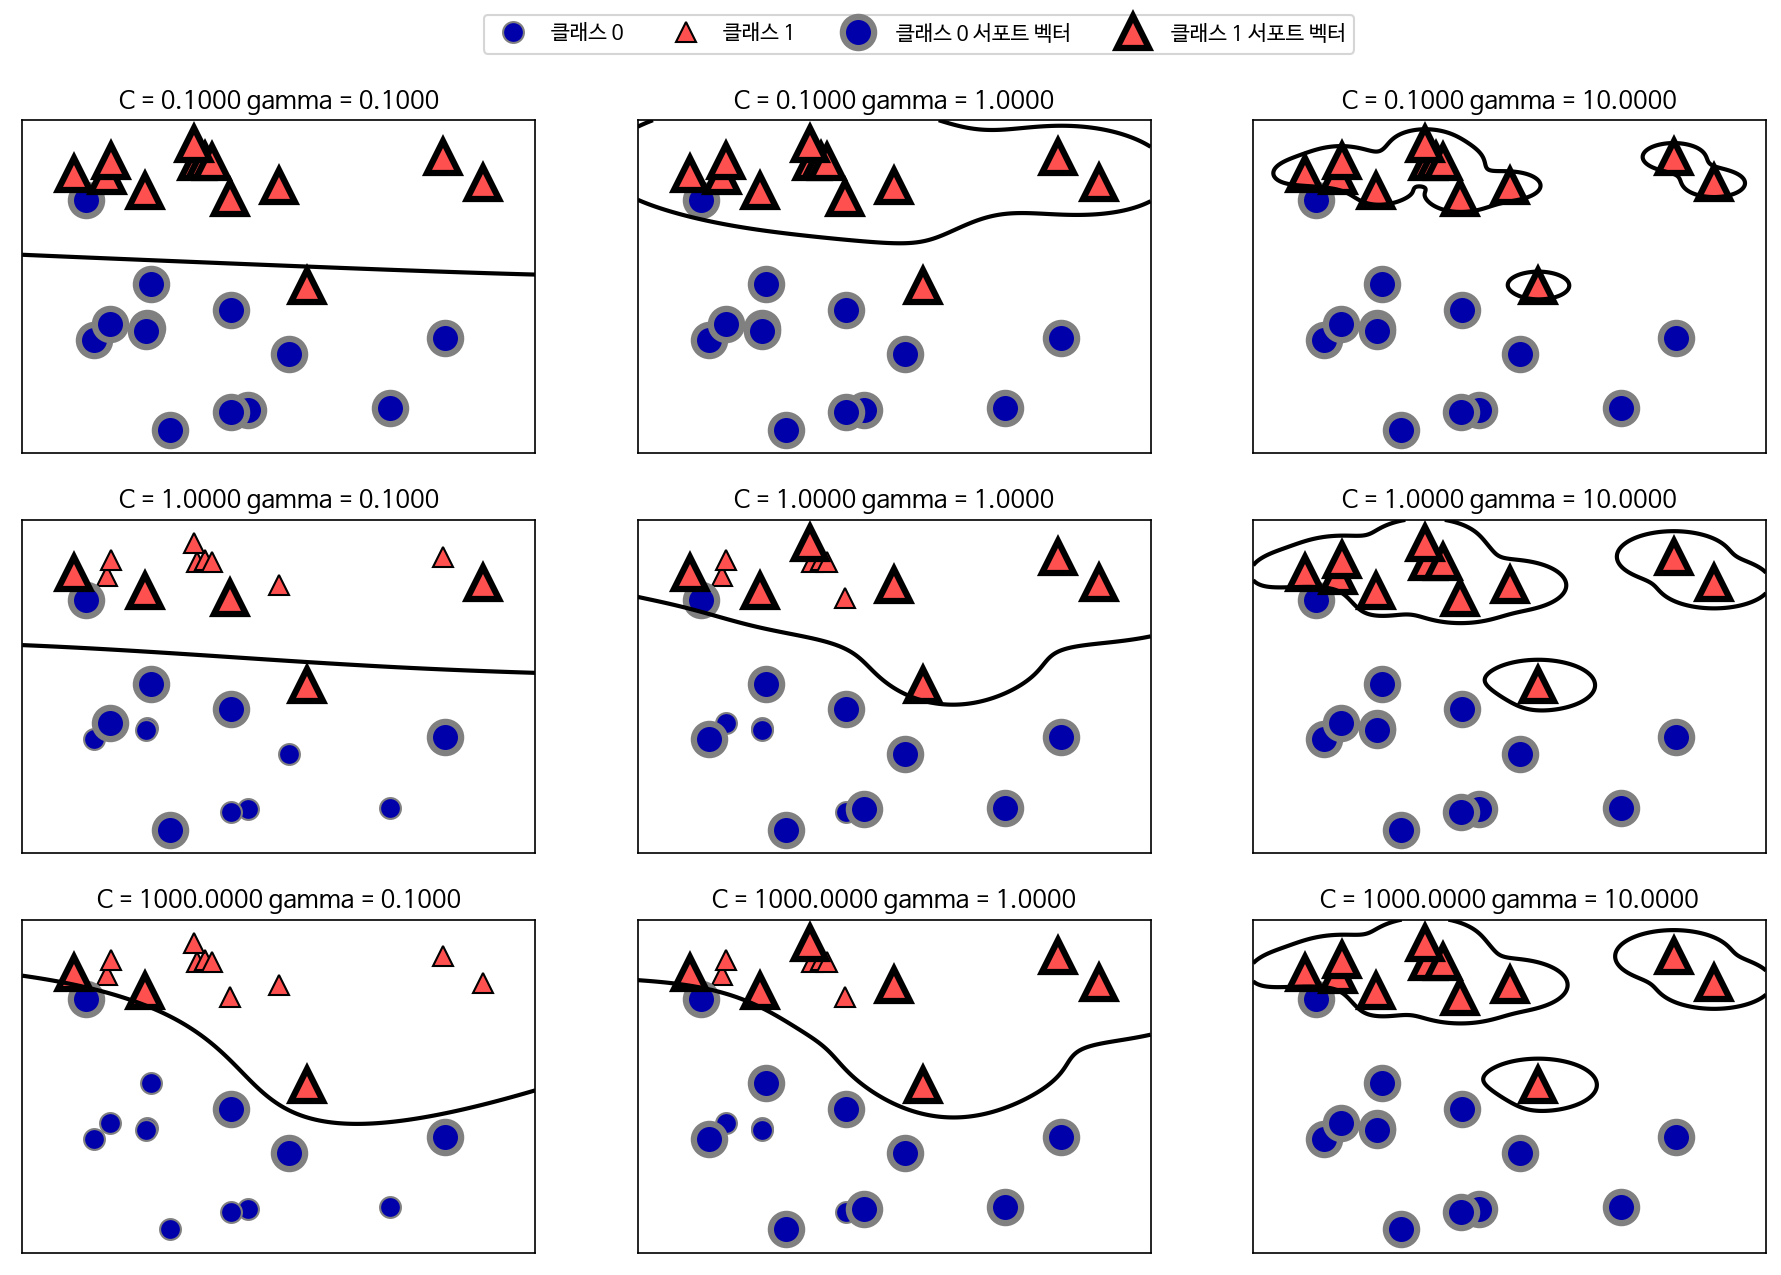

In [83]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["클래스 0","클래스 1","클래스 0 서포트 벡터","클래스 1 서포트 벡터"],
                 ncol=4,loc=(.9,1.2))

사이킷런 0.20 버전에서 SVC 클래스의 gamma 매개변수 옵션에 auto외에 scale가 추가되었습니다. auto는 1/n_features, 즉 특성개수의 역수입니다.

scale은 1/(n_features * X.std()) 로 스케일 조정이 되지 않은 특성에서 더 좋은 결과를 만듭니다. 사이킷런 0.22 버전부터는 gamma 매개변수의 기본값이 auto에서 scale로 변경됩니다. 서포트 벡터 머신을 사용하기 전에 특성을 표준화 전처리하면 scale과 auto는 차이가 없습니다.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.2f}".format(svc.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svc.score(X_test,y_test)))

훈련 세트 정확도 : 0.90
테스트 세트 정확도 : 0.94


Text(0, 0.5, '특성 크기')

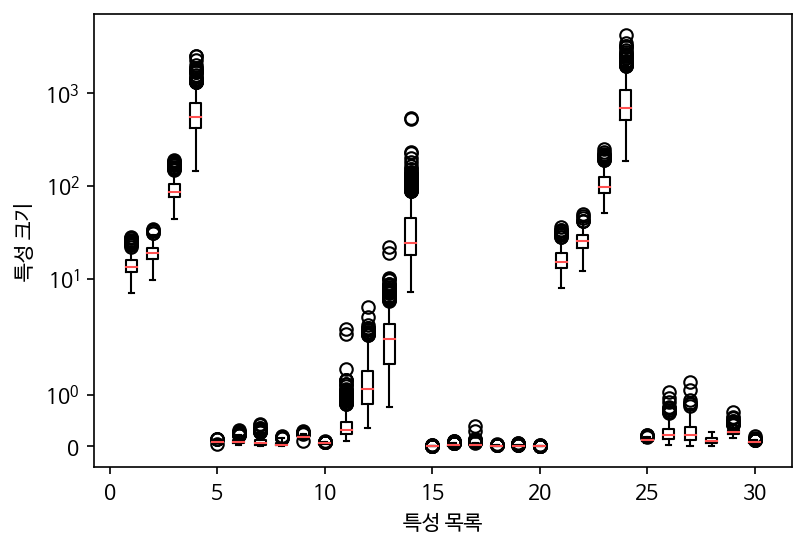

In [86]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

### SVM을 위한 데이터 전처리

In [87]:
# 훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)

# 훈련 세트에서 특성별 (최댓값 - 최소값) 범위 계산
range_on_traning = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1이 된다.
X_train_scaled = (X_train - min_on_training)/range_on_traning

print("train 특성 별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("train 특성 별 최대 값\n{}".format(X_train_scaled.max(axis=0)))

train 특성 별 최소 값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
train 특성 별 최대 값
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [88]:
# 테스트 세트에서도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다.(자세한 내용은 3장에서..)
X_test_scaled = (X_test - min_on_training)/range_on_traning

In [89]:
svc = SVC()
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도 : {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도 : 0.984
테스트 세트 정확도 : 0.972


In [90]:
svc = SVC(C=1000)
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도 : {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958
